In [13]:
#########################################
### Name : Md Ziauddin Ridoy ############
### Matriculation : 220100676 ####################


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from itertools import product

In [2]:
""""def Rosenbrock(x,y):
    return (1 - x)**2 + 100*(y - x**2)**2

def Grad_Rosenbrock(x,y):
    g1 = -400*x*y + 400*x**3 + 2*x -2
    g2 = 200*y -200*x**2
    return np.array([g1,g2])

def Hessian_Rosenbrock(x,y):
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])""""


    

In [ ]:
def Rosenbrock(x,y):
    return (1 - x)**2 + 100*(y - x**2)**2

def Grad_Rosenbrock(x,y):
    g1 = -400*x*y + 400*x**3 + 2*x -2
    g2 = 200*y -200*x**2
    return np.array([g1,g2])

def Hessian_Rosenbrock(x,y):
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])

In [ ]:
def plotFunc(x0,x1):
    x = np.linspace(-5, 7, 100)
    y = np.linspace(-1,3,100)
    plt.plot(x, Rosenbrock(x))
    plt.plot(x0, func(x0), 'ro')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Objective Function')

def plotPath(xs, ys, x0):
    plotFunc(x0)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'ro')

In [3]:
def Gradient_Descent(Grad,x,y, gamma = 0.00125, epsilon=0.00001, nMax = 100000 ):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        #print(X) 
        
        X_prev = X
        X = X - gamma * Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x,iter_y, iter_count


root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock,-2,2)

[0.99112457 0.98229221]


In [ ]:
def ArmijoLineSearch(f, xk, pk, gfk, phi0, alpha0, rho=0.5, c1=1e-4):
    """Minimize over alpha, the function ``f(xₖ + αpₖ)``.
    α > 0 is assumed to be a descent direction.
    
    Parameters
    --------------------
    f : callable
        Function to be minimized.
    xk : array
        Current point.
    pk : array
        Search direction.
    gfk : array
        Gradient of `f` at point `xk`.
    phi0 : float
        Value of `f` at point `xk`.
    alpha0 : scalar
        Value of `alpha` at the start of the optimization.
    rho : float, optional
        Value of alpha shrinkage factor.
    c1 : float, optional
        Value to control stopping criterion.
    
    Returns
    --------------------
    alpha : scalar
        Value of `alpha` at the end of the optimization.
    phi : float
        Value of `f` at the new point `x_{k+1}`.
    """
    derphi0 = np.dot(gfk, pk)
    phi_a0 = f(xk + alpha0*pk)
    
    while not phi_a0 <= phi0 + c1*alpha0*derphi0:
        alpha0 = alpha0 * rho
        phi_a0 = f(xk + alpha0*pk)
    
    return alpha0, phi_a0

In [ ]:
def GradientDescent(f, f_grad, init, alpha=1, tol=1e-5, max_iter=1000):
    """Gradient descent method for unconstraint optimization problem.
    given a starting point x ∈ Rⁿ,
    repeat
        1. Define direction. p := −∇f(x).
        2. Line search. Choose step length α using Armijo Line Search.
        3. Update. x := x + αp.
    until stopping criterion is satisfied.
    
    Parameters
    --------------------
    f : callable
        Function to be minimized.
    f_grad : callable
        The first derivative of f.
    init : array
        initial value of x.
    alpha : scalar, optional
        the initial value of steplength.
    tol : float, optional
        tolerance for the norm of f_grad.
    max_iter : integer, optional
        maximum number of steps.
    
    Returns
    --------------------
    xs : array
        x in the learning path
    ys : array
        f(x) in the learning path
    """
    # initialize x, f(x), and f'(x)
    xk = init    
    fk = f(xk)
    gfk = f_grad(xk)
    gfk_norm = np.linalg.norm(gfk)
    # initialize number of steps, save x and f(x)
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    print('Initial condition: y = {:.4f}, x = {} \n'.format(fk, xk))
    # take steps
    while gfk_norm > tol and num_iter < max_iter:
        # determine direction
        pk = -gfk
        # calculate new x, f(x), and f'(x)
        alpha, fk = ArmijoLineSearch(f, xk, pk, gfk, fk, alpha0=alpha)
        xk = xk + alpha * pk
        gfk = f_grad(xk)
        gfk_norm = np.linalg.norm(gfk)
        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
        print('Iteration: {} \t y = {:.4f}, x = {}, gradient = {:.4f}'.
              format(num_iter, fk, xk, gfk_norm))
    # print results
    if num_iter == max_iter:
        print('\nGradient descent does not converge.')
    else:
        print('\nSolution: \t y = {:.4f}, x = {}'.format(fk, xk))
    
    return np.array(curve_x), np.array(curve_y)

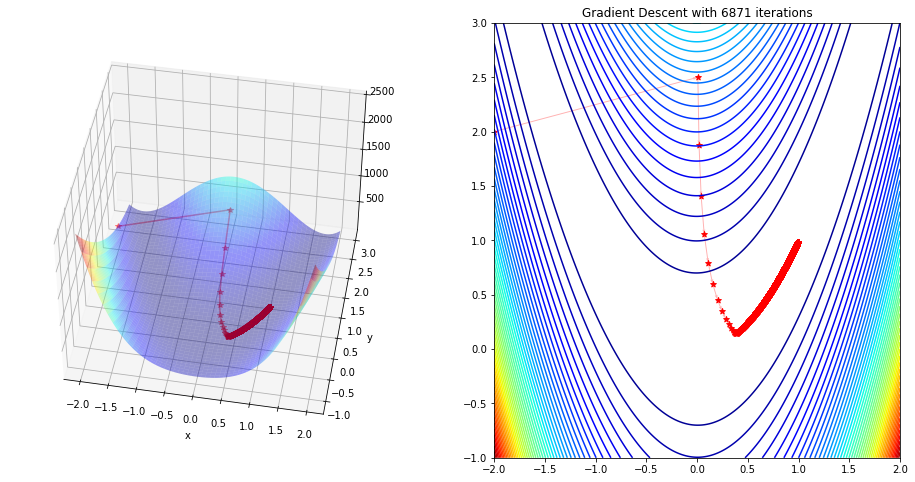

In [4]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))



plt.show()